# Анализ данных "Кинопоиск ТОП 250" на Pandas и визуализация с помощью Seaborn

#### Топ-250 фильмов по мнению кинопоиска представляет собой разнообразную коллекцию кинематографических шедевров, отражающих вкусы и предпочтения зрителей. Этот список включает в себя фильмы различных жанров и стран производства, демонстрируя качество и разнообразие мирового киноискусства. Изучая этот топ-250, можно увидеть, как различные культуры и тематики оказывают влияние на восприятие и оценку кинолент.

### На этой базе данных я хочу проанализировать: 

1. Топ 10 режиссеров по количеству фильмов, которые входят в топ 250 фильмов КиноПоиска, как мировых, так совесткий и российских
2. Самая частая оценка в топе 250 фильмов КиноПоиска
3. Узнать топ 10 стран по кол-ву производства фильмов и среднюю оценку за все фильмы страны в топе КиноПоиска
4. Топ популярных актеров и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска, как мировых, так совесткий и российских
5. Топ советских и российских сценаристов, фильмы которых находятся в топе 250 фильмов КиноПоиска
6. Какой "самый" молодой и самый "старый" фильм в подборке Кинопоиска?
7. Какой фильм с самым длинным описанием и с самым коротким? 

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
df = pd.read_csv('kinopoisk-top250.csv')
%matplotlib inline

## Посмотрим как выглядят данные

In [4]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        250 non-null    int64  
 1   movie         250 non-null    object 
 2   year          250 non-null    int64  
 3   country       250 non-null    object 
 4   rating_ball   250 non-null    float64
 5   overview      250 non-null    object 
 6   director      250 non-null    object 
 7   screenwriter  250 non-null    object 
 8   actors        250 non-null    object 
 9   url_logo      250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [182]:
df.columns

Index(['rating', 'movie', 'year', 'country', 'rating_ball', 'overview',
       'director', 'screenwriter', 'actors', 'url_logo'],
      dtype='object')

## Отлично! В наших данных нет пропусков и пустых элементов, давайте построим график pairplot и матрицу корреляций, чтобы посмотреть взаимосвязь данных между собой

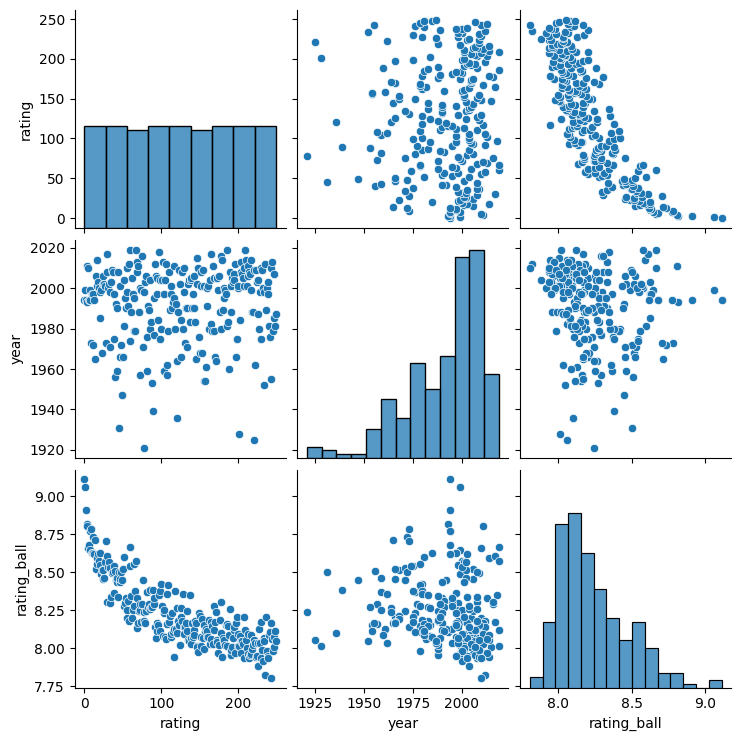

In [25]:
sns.pairplot(df)

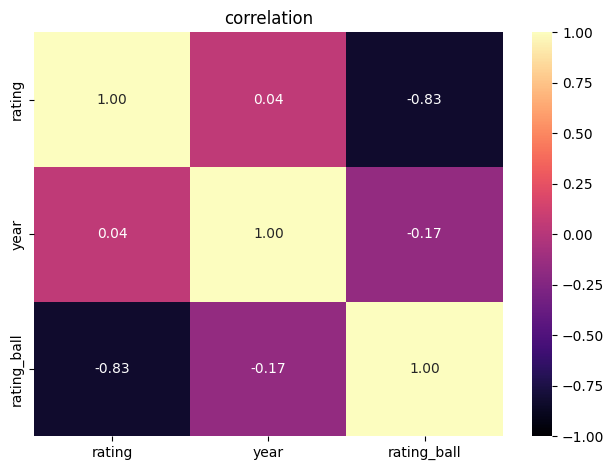

In [159]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f',vmin=-1,vmax=1,center=0)
plt.gca().set_title('correlation')
plt.tight_layout()
plt.show()

## Топ 10 режиссеров по количеству фильмов, которые входят в топ 250 фильмов КиноПоиска:

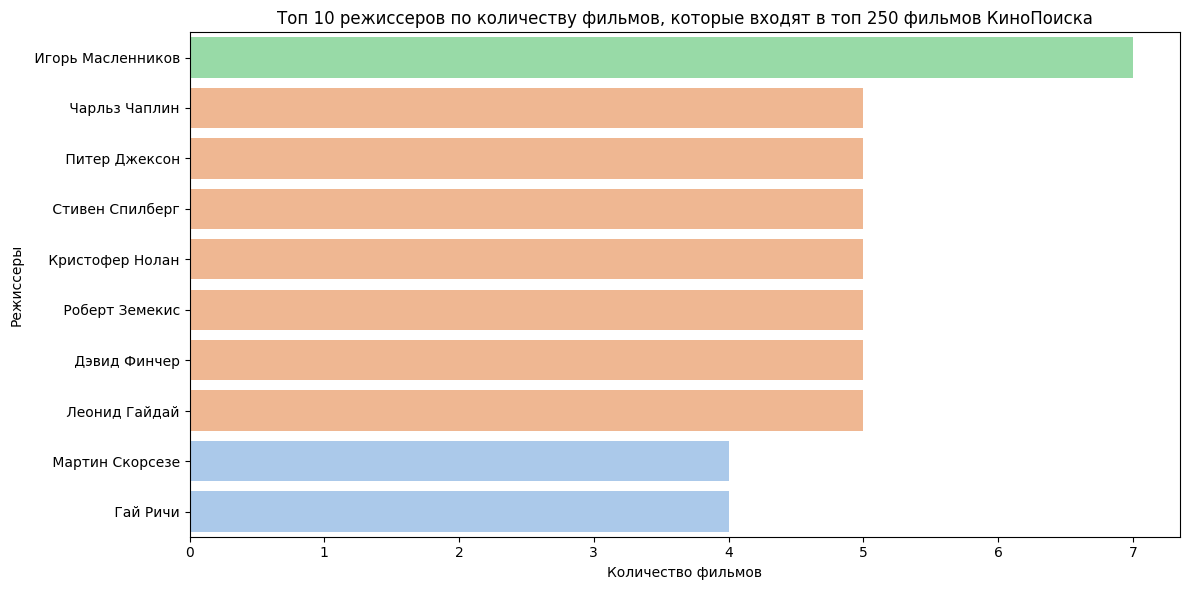

In [33]:
top_dir = df['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dir.values, y=top_dir.index, hue=top_dir.values,palette='pastel',legend=False)
plt.xlabel('Количество фильмов')
plt.ylabel('Режиссеры')
plt.title('Топ 10 режиссеров по количеству фильмов, которые входят в топ 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## Топ 10 Российских и Советских режиссеров по количеству фильмов, которые входят в топ 250 фильмов КиноПоиска:

Круто, что российские и советские режиссеры входят в топ кинопоиска, потому что это признание их таланта и вклада в киноискусство, как на местном, так и на международном уровне. Это особенно значимо, учитывая распространённое мнение о низком качестве российского кино, но факт его присутствия в топ-250 фильмов кинопоиска свидетельствует об обратном, что способствует укреплению имиджа российской кинематографии и её привлекательности для зрителей со всего мира.

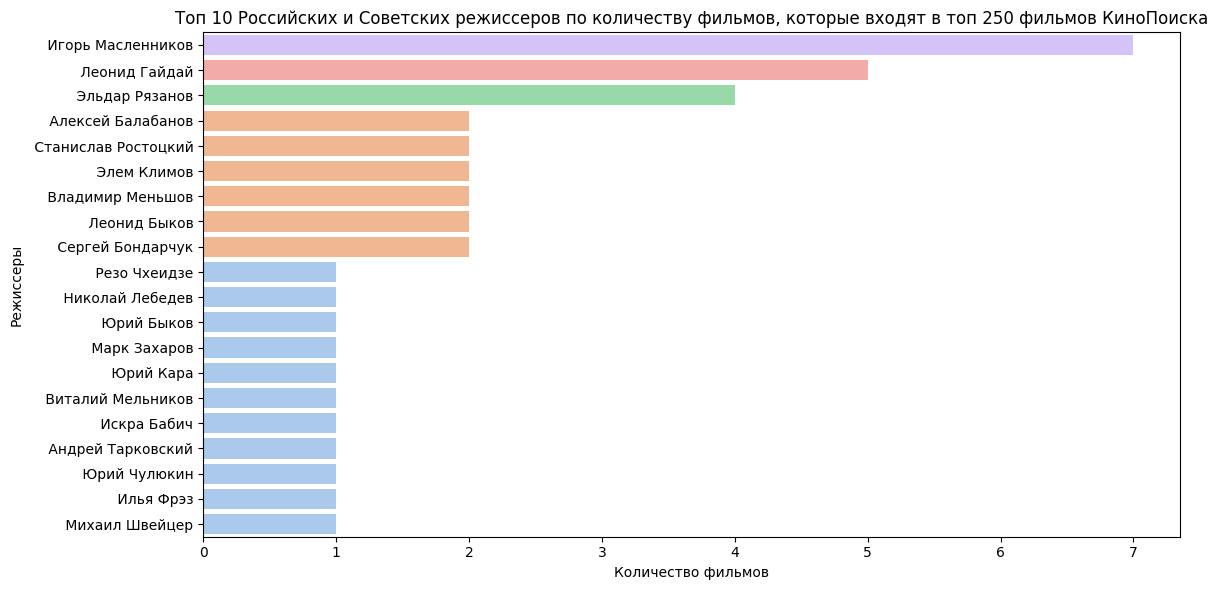

In [63]:
rus_cccr_film = df[(df['country'] == 'СССР') | (df['country'] == 'Россия')]
top_dir_russia_cccr = rus_cccr_film['director'].value_counts().head(20)
top_dir_russia_cccr

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dir_russia_cccr.values, y=top_dir_russia_cccr.index, hue=top_dir_russia_cccr.values,palette='pastel',legend=False)
plt.xlabel('Количество фильмов')
plt.ylabel('Режиссеры')
plt.title('Топ 10 Российских и Советских режиссеров по количеству фильмов, которые входят в топ 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## Самая частая оценка в топе 250 фильмов КиноПоиска:

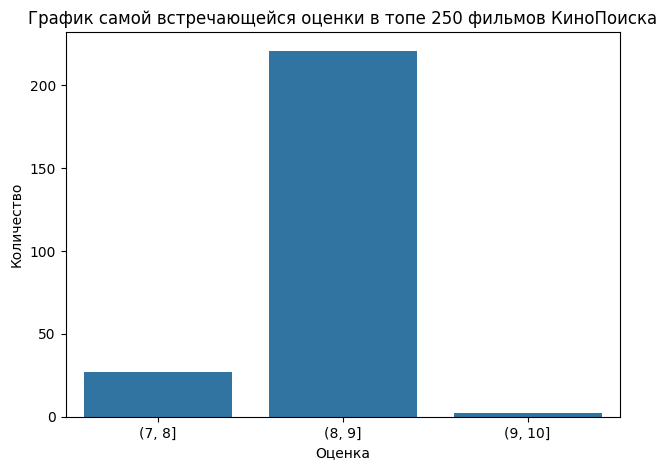

In [111]:
df['reting_year'] = pd.cut(df['rating_ball'],[7,8,9,10])
reting = pd.DataFrame(df.groupby('reting_year', observed=True)['year'].agg('count'))

sns.barplot(reting, x="reting_year", y="year")
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('График самой встречающейся оценки в топе 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## Топ 10 стран по кол-ву производства фильмов и среднюю оценку за все фильмы страны в топе КиноПоиска:

Общепризнанно, что некоторые страны имеют богатое кинематографическое наследие и активно развивают киноиндустрию. Топ-10 стран по количеству произведенных фильмов обычно включает такие кинопроизводящие нации, как США, Индия, Китай, Япония, Франция и другие. Когда дело доходит до средней оценки фильмов из этих стран на ресурсах, например, на КиноПоиске, это может отражать не только количество произведений, но и качество их исполнения, а также востребованность у зрителей.

In [123]:
rating_ball_per_country = pd.DataFrame(df.groupby('country', observed=True)['rating_ball'].agg(['count','mean'])).sort_values(by='count',ascending=False)
rating_ball_per_country

,count,mean
country,,
США,147,8.211136
СССР,41,8.331024
Великобритания,15,8.211667
Франция,8,8.235375
Япония,7,8.240857
Италия,7,8.289286
Германия,6,8.163333
Россия,4,8.087500
Индия,3,8.090000


## 10 актеров и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска:

Включение актеров и их фильмов в топ-250 на КиноПоиске является свидетельством их значимости и влияния на кинематографическую индустрию. Эти актеры не только обладают талантом и привлекательностью для зрителей, но и участвуют в создании кинолент, которые становятся классикой и остаются популярными с годами. Их фильмы оказывают важное воздействие на культуру и становятся объектом изучения.

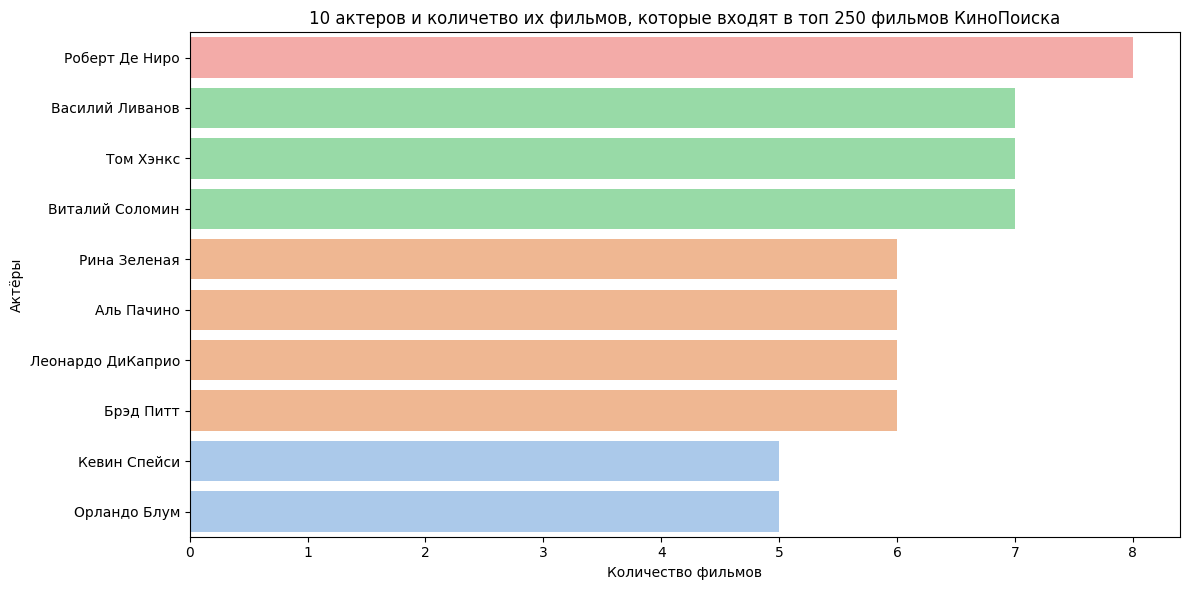

In [153]:
list_of_actors = list(df.actors)
list_of_actors
all_actors_cleared = []
for i in range(len(list_of_actors)):
    m = []
    m = list_of_actors[i].split(';')
    for n in range(len(m)):
        all_actors_cleared.append((m[n]).strip())
all_actors_cleared = pd.Series(all_actors_cleared).value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=all_actors_cleared.values, y=all_actors_cleared.index, hue=all_actors_cleared.values,palette='pastel',legend=False)
plt.xlabel('Количество фильмов')
plt.ylabel('Актёры')
plt.title('10 актеров и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## 10 Российских и Советских актеров и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска:

Включение российских и советских актеров в топ-250 фильмов КиноПоиска является важным признанием их таланта и вклада в кинематографическое искусство. Это подтверждает высокое качество кино, созданного в России и СССР, и позволяет сохранить и продемонстрировать богатое культурное наследие страны. 

Для российской киноиндустрии это огромное достижение, поскольку это способствует привлечению внимания к отечественному кино как на внутреннем, так и на мировом рынке. Этот успех также стимулирует развитие и поддержку местных талантов и производителей фильмов, создавая благоприятную атмосферу для процветания киноиндустрии в России.

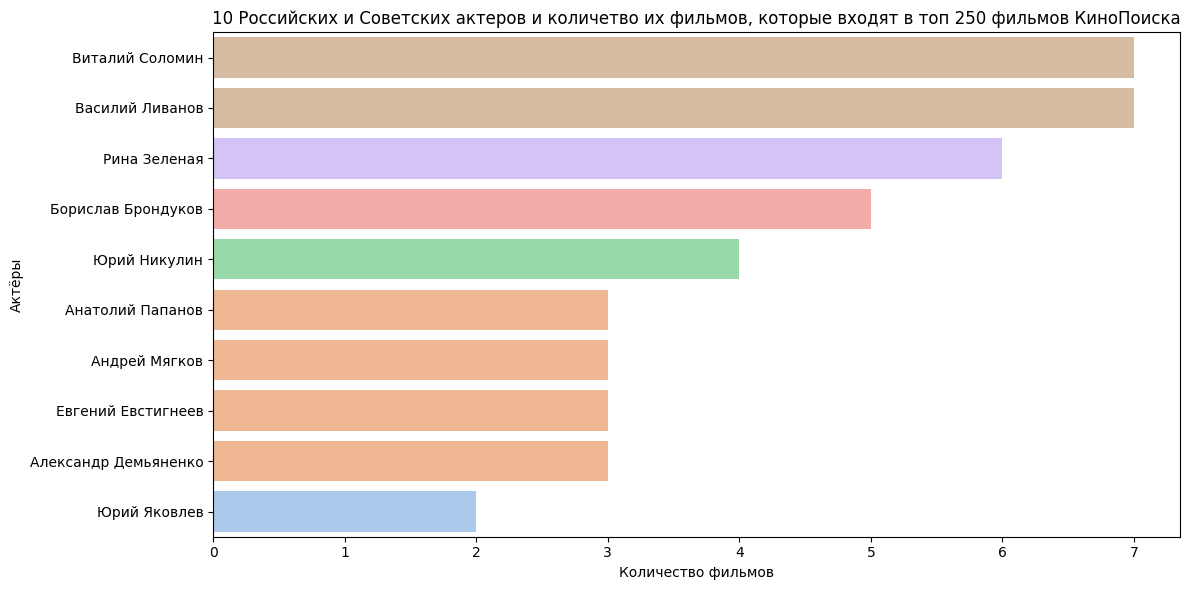

In [151]:
rus_cccr_film = df[(df['country'] == 'СССР') | (df['country'] == 'Россия')]

list_of_actors = list(rus_cccr_film.actors)
list_of_actors
all_actors_cleared = []
for i in range(len(list_of_actors)):
    m = []
    m = list_of_actors[i].split(';')
    for n in range(len(m)):
        all_actors_cleared.append((m[n]).strip())
all_actors_cleared = pd.Series(all_actors_cleared).value_counts()
all_actors_cleared = all_actors_cleared.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=all_actors_cleared.values, y=all_actors_cleared.index, hue=all_actors_cleared.values,palette='pastel',legend=False)
plt.xlabel('Количество фильмов')
plt.ylabel('Актёры')
plt.title('10 Российских и Советских актеров и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## 10 Российских и Советских сценаристов и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска:

Заметим, что в этом топе нет ни одного росийского сценариста и все либо с советского союза, либо в том числе ис других стран. Это очень печально, так как новых, по-настоящему хороших сценаристов просто нет. Те фильмы, которые попали в этот список -- великое наследие советского кино, поэтому тезис о том, что российские фильмы плохие, как раз из-за отсутсвия сценаристов, которые могут написать интересный сценарий, а не очередную второсортну кальку западного кинематографа, выдавая это за свой.

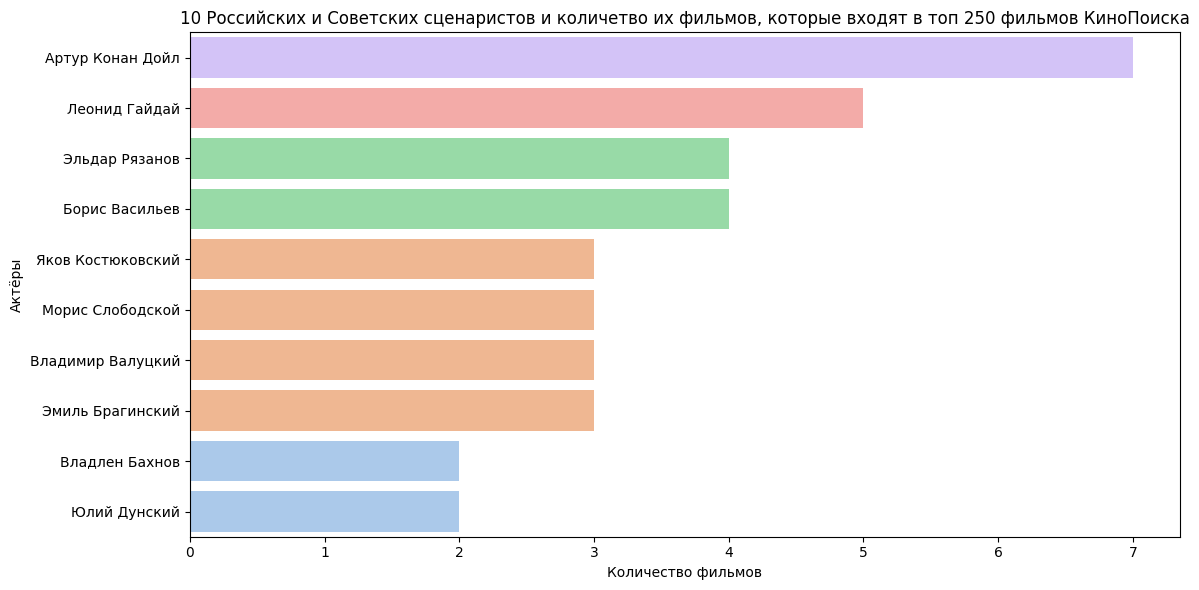

In [178]:
rus_cccr_film = df[(df['country'] == 'СССР') | (df['country'] == 'Россия')]

list_of_screenwriter = list(rus_cccr_film.screenwriter)
list_of_screenwriter
all_screenwriter_cleared = []
for i in range(len(list_of_screenwriter)):
    m = []
    m = list_of_screenwriter[i].split(';')
    for n in range(len(m)):
        all_screenwriter_cleared.append((m[n]).strip())
all_screenwriter_cleared = pd.Series(all_screenwriter_cleared).value_counts()
all_screenwriter_cleared = all_screenwriter_cleared.head(10)
all_screenwriter_cleared

plt.figure(figsize=(12, 6))
sns.barplot(x=all_screenwriter_cleared.values, y=all_screenwriter_cleared.index, hue=all_screenwriter_cleared.values,palette='pastel',legend=False)
plt.xlabel('Количество фильмов')
plt.ylabel('Актёры')
plt.title('10 Российских и Советских сценаристов и количетво их фильмов, которые входят в топ 250 фильмов КиноПоиска')
plt.tight_layout()
plt.show()

## Cамый "молодой" и самый "старый" фильм в подборке Кинопоиска:

In [181]:
old_film = df.loc[df.year == df.year.min()].loc[:, ['movie', 'director', 'year']]
young_film = df.loc[df.year == df.year.max()].loc[:, ['movie', 'director', 'year']]
movies = pd.concat([the_oldest_film, the_youngest_film])
movies

,movie,director,year
78,Малыш,Чарльз Чаплин,1921
60,Клаус,Серхио Паблос; Карлос Мартинес Лопес,2019
67,Джентльмены,Гай Ричи,2019
186,Джокер,Тодд Филлипс,2019
209,Ford против Ferrari,Джеймс Мэнголд,2019


## Фильмы с самым длинным описанием и с самым коротким описанием:

In [198]:
df["len_overview"] = df["overview"].apply(lambda x: len(x))
maxx = df.sort_values(by='len_overview', ascending=False).head(1)
minn = df.sort_values(by='len_overview', ascending=True).head(1)
maxx


,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,len_descrip,len_overview
68,68,Гран Торино,2008,Германия,8.131,Вышедший на пенсию автомеханик Уолт Ковальски ...,Клинт Иствуд,Ник Шенк; Дэйв Джонсон,Клинт Иствуд; Би Ванг; Кристофер Карли; Эни Хи...,'https://st.kp.yandex.net/images/film_iphone/i...,1073,1073


In [199]:
minn

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,len_descrip,len_overview
201,201,Цирк,1928,США,8.015,Грустная комедия о приключениях Чарли в состав...,Чарльз Чаплин,Чарльз Чаплин,Чарльз Чаплин; Мерна Кеннеди; Аль Эрнест Гарси...,'https://st.kp.yandex.net/images/film_iphone/i...,70,70
